In [202]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [203]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [247]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [205]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [206]:
# reflect an existing database into a new model - Declare a Base using `automap_base()`
Base = automap_base()

# reflect the table - Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)


In [207]:
# View all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [208]:
# Save references to each table
# Assign the Measurement class to a variable called `Measurement`
Measurement = Base.classes.measurement
# Assign the Station class to a variable called `Station`
Station = Base.classes.station

In [209]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [246]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()

# Close the session
session.close()
most_recent_date

('2017-08-23',)

Text(0, 0.5, 'inches')


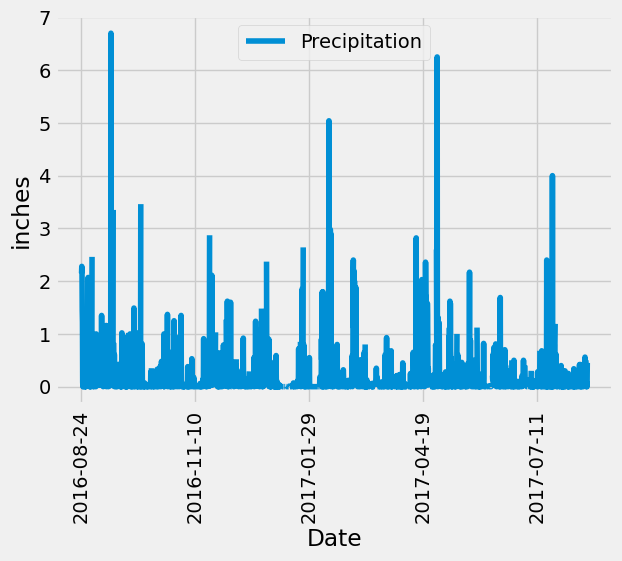

In [211]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
formatted = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
one_year_ago = formatted - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date, Measurement.prcp).filter(
    Measurement.date >= one_year_ago
).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precip_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df = df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='Date', y='Precipitation', kind='line', legend=True)
plt.xlabel("Date")
ylabel = plt.ylabel("inches")
plt.xticks(rotation=90)
print(ylabel)
plt.show()

In [212]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [218]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station).distinct().count()
print(station_count)
# Close the session
session.close()

9


In [219]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = (
    session.query(Measurement.station, func.count(Measurement.station).label('count'))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())
    .all()
)
# Print the result
for station, count in most_active_stations:
    print(f"Station: {station}, Count: {count}")
session.close()

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [243]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Get the most active station
most_active_station_result = (
    session.query(Measurement.station)
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())
    .first()  
)

# Check if the most active station was found
if most_active_station_result:
    most_active_station_id = most_active_station_result[0]
    
    # Query to get temperature statistics for the most active station
    temperature_stats = (
        session.query(
            func.min(Measurement.tobs).label('min_temp'),
            func.max(Measurement.tobs).label('max_temp'),
            func.avg(Measurement.tobs).label('avg_temp')
        )
        .filter(Measurement.station == most_active_station_id)
        .one()
    )

    # Print the temperature statistics in a formatted string
    print("Temperature statistics for the most active station:")
    print(f"Minimum Temperature: {temperature_stats.min_temp}")
    print(f"Maximum Temperature: {temperature_stats.max_temp}")
    print(f"Average Temperature: {temperature_stats.avg_temp:.2f}")
# Close the session
session.close()


Temperature statistics for the most active station:
Minimum Temperature: 54.0
Maximum Temperature: 85.0
Average Temperature: 71.66


Text(0.5, 0, 'Temperature')


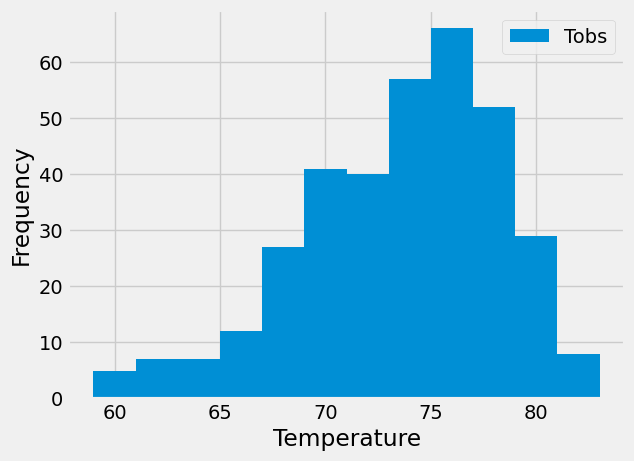

In [242]:
if most_active_station_result:
    most_active_station_id = most_active_station_result[0]


    # Query the last 12 months of temperature observation data
    temperature_data = (
        session.query(Measurement.tobs)
        .filter(Measurement.station == most_active_station_id)
        .filter(Measurement.date >= one_year_ago)
        .all()
    )

    # Convert the results to a DataFrame
    temperature_df = pd.DataFrame(temperature_data, columns=['tobs'])

    # Plot the results as a histogram

    plt.hist(temperature_df['tobs'], bins=12)
    xlabel = plt.xlabel('Temperature')
    plt.ylabel('Frequency')
    plt.legend(['Tobs'])
    print(xlabel)
    plt.show()

# Close the session
session.close()

# Close Session

In [244]:
# Close Session
session.close()